In [108]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt

```% Created by Eugene M. Izhikevich, February 25, 2003

% Excitatory neurons Inhibitory neurons
Ne=800; Ni=200;
re=rand(Ne,1); ri=rand(Ni,1);

a=[0.02*ones(Ne,1); 0.02+0.08*ri];
b=[0.2*ones(Ne,1); 0.25-0.05*ri];
c=[-65+15*re.^2; -65*ones(Ni,1)];
d=[8-6*re.^2; 2*ones(Ni,1)];

S=[0.5*rand(Ne+Ni,Ne), -rand(Ne+Ni,Ni)];

v=-65*ones(Ne+Ni,1); % Initial values of v
u=b.*v; % Initial values of u

firings=[]; % spike timings

for t=1:1000 % simulation of 1000 ms

    I=[5*randn(Ne,1);2*randn(Ni,1)]; % thalamic input
    
    fired=find(v>=30); % indices of spikes
    firings=[firings; t+0*fired,fired];

    v(fired)=c(fired);
    u(fired)=u(fired)+d(fired);

    I=I+sum(S(:,fired),2);

    v=v+0.5*(0.04*v.^2+5*v+140-u+I); % step 0.5 ms
    v=v+0.5*(0.04*v.^2+5*v+140-u+I); % for numerical

    u=u+a.*(b.*v-u); % stability
end;


In [ ]:
# Parámetros y condiciones iniciales

np.random.seed(42)

# Definimos Neuronas (1000 - 80% e, 20% i)
Ne = int(0.5*800)  # Excitatory neurons
Ni = int(0.5*200)  # Inhibitory neurons

# Inicializamos aleatoriamente
re = np.random.rand(Ne)
ri = np.random.rand(Ni)

# Definimos las matrices de parametros para (Excit - Inhib)
a = np.concatenate([0.02*np.ones(Ne), 0.02+0.08*ri])
b = np.concatenate([0.2*np.ones(Ne), 0.25-0.05*ri])
c = np.concatenate([-65+15*re**2, -65*np.ones(Ni)])
d = np.concatenate([8-6*re**2, 2*np.ones(Ni)])

#k = 5e5/(Ne+Ni)**2

k = 0.5

# Definimos la matriz de acoplamiento (random) (0.5 para excitatorias y -1 para inhib)
S = np.concatenate([k * np.random.rand(Ne + Ni, Ne), 
                    -2*k*np.random.rand(Ne + Ni, Ni)], axis=1)

# Condiciones iniciales
v = -65*np.ones(Ne+Ni) # Initial values of v
u = b*v # Initial values of u

# Lista de picos
firings = [] # spike timings

((array([256., 102.,  80.,  72.,  59.,  47.,  50.,  41.,  49.,  44.]),
  array([2.56196310e-05, 9.99666003e-02, 1.99907581e-01, 2.99848562e-01,
         3.99789542e-01, 4.99730523e-01, 5.99671504e-01, 6.99612484e-01,
         7.99553465e-01, 8.99494446e-01, 9.99435426e-01]),
  <BarContainer object of 10 artists>),
 (array([23., 23., 26., 17., 22., 23., 17., 13., 18., 18.]),
  array([0.00463202, 0.10385625, 0.20308047, 0.30230469, 0.40152891,
         0.50075314, 0.59997736, 0.69920158, 0.79842581, 0.89765003,
         0.99687425]),
  <BarContainer object of 10 artists>))

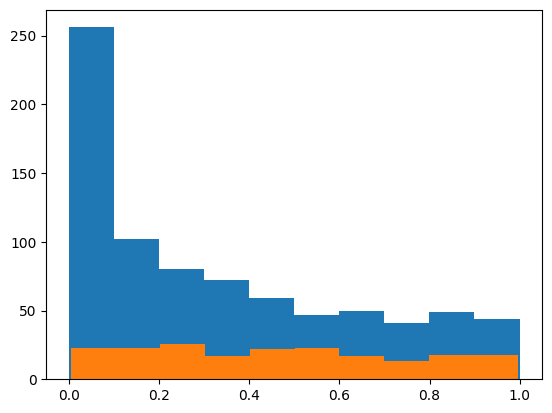

In [ ]:
plt.hist(re**2), plt.hist(ri)

In [ ]:
re.shape, ri.shape

((800,), (200,))

In [ ]:
a.shape, b.shape, c.shape, d.shape

((1000,), (1000,), (1000,), (1000,))

In [ ]:
S.shape, v.shape, u.shape

((1000, 1000), (1000,), (1000,))

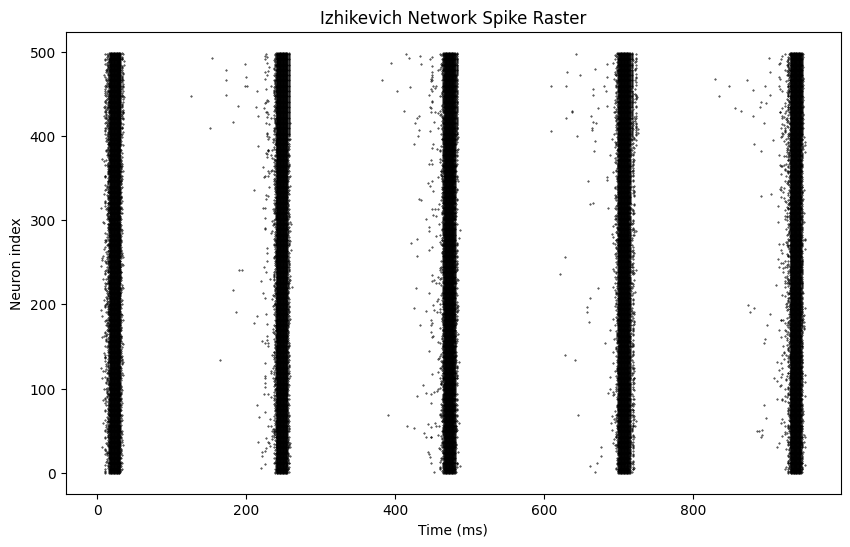

In [132]:
# Simulation of 1000 ms

potentials = [v]

for t in range(1000):
    I = np.concatenate([5 * np.random.randn(Ne), 2 * np.random.randn(Ni)])  # thalamic input
    fired = np.where(v >= 30)[0]  # indices of spikes
    
    if len(fired) > 0:
        firings.extend([[t, neuron] for neuron in fired])
        v[fired] = c[fired]
        u[fired] = u[fired] + d[fired]
        I = I + np.sum(S[:, fired], axis=1)
    
    # Two half-steps for numerical stability
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    v = v + 0.5 * (0.04 * v**2 + 5 * v + 140 - u + I)
    u = u + a * (b * v - u)

    potentials.append(v)

# Convert firings to array for plotting
if firings:
    firings = np.array(firings)
    plt.figure(figsize=(10, 6))
    plt.plot(firings[:, 0], firings[:, 1], '.', markersize=0.8, color = 'black')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron index')
    plt.title('Izhikevich Network Spike Raster')
    plt.show()
else:
    print("No spikes recorded")

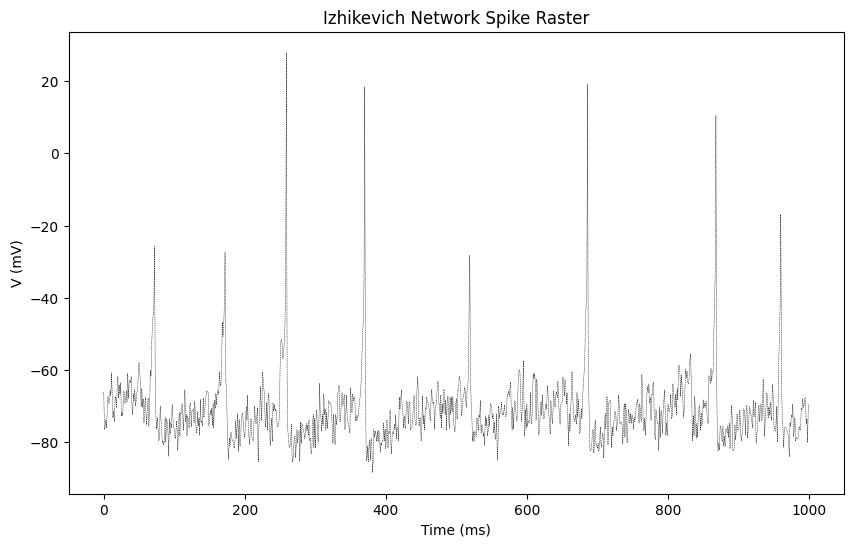

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(range(1000), np.array(potentials)[1:,0], '--', linewidth=0.3, color = 'black')
plt.xlabel('Time (ms)')
plt.ylabel('V (mV)')
plt.title('Izhikevich Network Spike Raster')
plt.show()